In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt 



# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [9]:
def load_house_data():
    data = np.loadtxt("/media/indraneel/YO/Programming/ML/datafiles/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [10]:
#Load the dataset 
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [11]:
#Normalize the dataset using computation
def Z_score(X):

    mu = np.mean(X,axis=0)

    sigma = np.std(X,axis=0)

    X_norm = (X - mu)/sigma
    return X_norm,mu,sigma

In [12]:
X_norm,X_mu,X_sigma = Z_score(X_train)
X_norm[:5]

array([[-0.42363245,  0.43380884, -0.78927234,  0.99372644],
       [ 1.2842716 ,  0.43380884,  1.2669898 , -0.82954214],
       [ 0.74493348,  0.43380884,  1.2669898 ,  0.14028157],
       [ 1.31342501,  0.43380884,  1.2669898 , -0.90712804],
       [-0.25357088, -1.10001528, -0.78927234, -0.94592099]])

In [13]:
#Normalize using sckitlearn
scaler = StandardScaler()
X_norm_1 = scaler.fit_transform(X_train)
X_norm = X_norm_1


In [14]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm,y_train)
print(sgdr)

SGDRegressor()


In [15]:
#Model Parameters
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
print(f"The weight and the bias would be : {w_norm} and {b_norm}")
w_prev = np.array([110.56039756, -21.26715096, -32.70718139, -37.97015909])
b_prev = 363.15608080808056
print(f"The weight and the bias from previous woudl be : {w_prev} and b : {b_prev}")
print(f"The differnece would be {w_norm - w_prev} and {b_norm - b_prev}")
sgdr.learning_rate

The weight and the bias would be : [110.16473787 -21.08205594 -32.50298488 -38.04720769] and [363.17314914]
The weight and the bias from previous woudl be : [110.56039756 -21.26715096 -32.70718139 -37.97015909] and b : 363.15608080808056
The differnece would be [-0.39565969  0.18509502  0.20419651 -0.0770486 ] and [0.01706833]


'invscaling'

In [16]:
#Predict the values
yp_sgdr = sgdr.predict(X_norm)
print(f"Predicted Values : {yp_sgdr[:5]} \nTarget   Values:   {y_train[:5]}")
yp = np.dot(X_norm,w_norm) + b_norm
(yp == yp_sgdr).all()

Predicted Values : [295.2033996  485.88982295 389.57469591 492.05342768 420.07252224] 
Target   Values:   [300.  509.8 394.  540.  415. ]


True

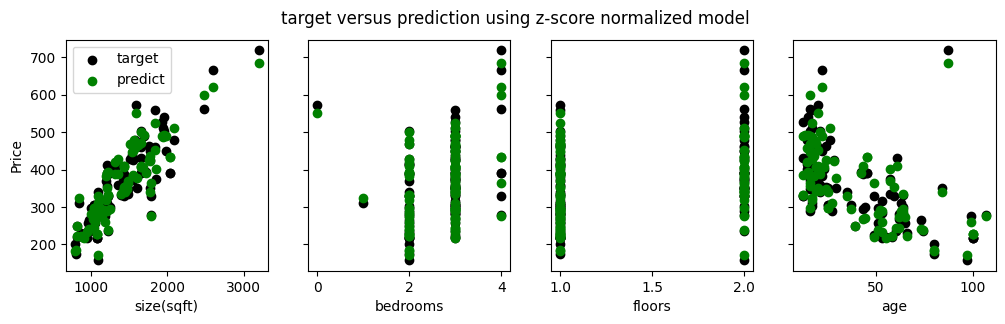

In [17]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, color="black", label = 'target')
    ax[i].scatter(X_train[:,i],yp_sgdr,color="green", label = 'predict')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [18]:
x_house = np.array([1200, 3, 1, 40])
print(x_house)
#converting a sample into 2d array
x_house = x_house.reshape((1,-1))
print(x_house)
x_house_norm = scaler.fit_transform(x_house)
sgdr.predict(x_house_norm)

[1200    3    1   40]
[[1200    3    1   40]]


array([363.17314914])

In [19]:
SGDRegressor(max_iter=1000)
scaler = StandardScaler()
yp_sgdr = sgdr.predict(X_norm)
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
x_house_norm = scaler.fit_transform(x_house)
sgdr.fit(X_norm,y_train)

SGDRegressor()